# 5. High-Performance Simulators

---
## Question 5.1

**What is the result of this circuit when run on the `StatevectorSimulator`?**

<img src="..\images\simulators_images\q2.png" align="left"/>

**1)**  `[0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j]`

**2)**  `[0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j, 
 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j]`

**3)**  `[0.+0.70710678j, 0.70710678+0.j, 0.+0.70710678j, 0.70710678+0.j, 
 0.+0.70710678j, 0.70710678+0.j, 0.+0.70710678j, 0.70710678+0.j]`

**4)**  `[0.35355339+0.j, 0.+0.35355339j, 0.35355339+0.j, 0.+0.35355339j, 
 0.35355339+0.j, 0.+0.35355339j, 0.35355339+0.j, 0.+0.35355339j]`

**5)** None of the above

In [2]:
from qiskit import QuantumCircuit, execute, Aer

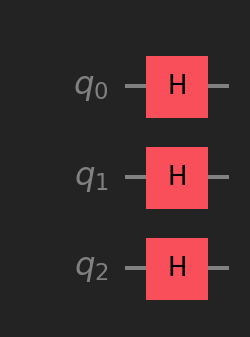

In [3]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.draw('mpl')

In [4]:
S_simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, backend = S_simulator)
results = job.result()
ψ = results.get_statevector(qc)
ψ.draw()

<IPython.core.display.Latex object>

In [5]:
ψ.draw('text')

[0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,
 0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,0.35355339+0.j]

In [6]:
from qiskit.providers.aer import StatevectorSimulator

In [7]:
S_simulator = StatevectorSimulator()
job = S_simulator.run(qc)
results = job.result()
ψ = results.get_statevector(qc)
ψ.draw('text')

[0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,
 0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,0.35355339+0.j]

---
## Question 5.2

**You can also use `Statevector` class in the `quantum_info` module to simulate circuits and obtain state vector.
Given the following code, which option produces a different state vector from the rest?**

```
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
```

**1)** `qi.Statevector.from_instruction(qc)`

**2)** `qi.Statevector(np.array([1, 0, 1, 0]) / np.sqrt(2))`

**3)** `np.sqrt(0.5) * (qi.Statevector.from_label('00') + qi.Statevector.from_label('11'))`

**4)** `qi.Statevector.from_label('00').evolve(qc)`

**5)** None of the above

In [8]:
import qiskit.quantum_info as qi
import numpy as np

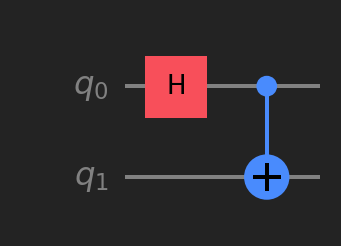

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

In [10]:
ψ1 = qi.Statevector.from_instruction(qc)
ψ1

<IPython.core.display.Latex object>

In [11]:
ψ1 = qi.Statevector(qc)
ψ1

<IPython.core.display.Latex object>

In [12]:
ψ2 = qi.Statevector(np.array([1, 0, 1, 0]) / np.sqrt(2))
ψ2

<IPython.core.display.Latex object>

In [13]:
ψ3 = np.sqrt(0.5) * (qi.Statevector.from_label('00') + qi.Statevector.from_label('11'))
ψ3

<IPython.core.display.Latex object>

In [14]:
ψ4 = qi.Statevector.from_label('00').evolve(qc)
ψ4

<IPython.core.display.Latex object>

---
## Question 5.3

**What is the result of this circuit when run on the `UnitarySimulator?`**

<img src="..\images\simulators_images\q3.png" align="left"/>

**1)** ```[[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]```
 
**2)**  ```[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]```
 
**3)**  ```[[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]```
 
**4)**  ```[[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]```
 
 **5)** None of the above

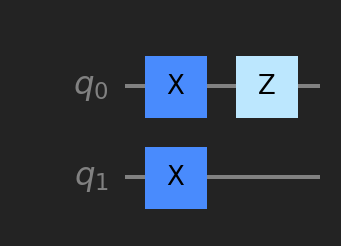

In [15]:
qc = QuantumCircuit(2)
qc.x([0,1])
qc.z(0)
qc.draw()

In [16]:
from qiskit.visualization import array_to_latex

In [17]:
U_simulator = Aer.get_backend('unitary_simulator')
job = execute(qc, backend = U_simulator)
result = job.result()
U = result.get_unitary()
array_to_latex(U)

<IPython.core.display.Latex object>

---
## Question 5.4

**You can also use Operator class in the quantum_info module to simulate circuits and obtain unitary.
Given the following code, which option produces a different unitary from the rest?**

```
import qiskit.quantum_info as qi
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
```

**1)** `qi.Operator(qc)`

**2)** `qi.Operator.from_label('II').compose(HGate(), [0]).compose(CXGate(), [0, 1])`

**3)** `qi.Operator.from_label('HI') + qi.Operator.from_label('CX')`

**4)** `qi.Operator.from_label('II').compose(qc)`

**5)**  None of the above

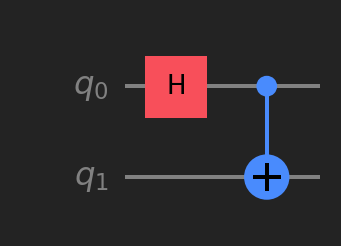

In [18]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

In [19]:
array_to_latex(qi.Operator(qc))

<IPython.core.display.Latex object>

In [20]:
from qiskit.circuit.library import HGate, CXGate
array_to_latex(qi.Operator.from_label('II').compose(HGate(), [0]).compose(CXGate(), [0, 1]))

<IPython.core.display.Latex object>

In [21]:
array_to_latex(qi.Operator.from_label('HI') + qi.Operator.from_label('CX'))

QiskitError: 'Label contains invalid characters.'

In [22]:
array_to_latex(qi.Operator.from_label('II').compose(qc))

<IPython.core.display.Latex object>

---
## Question 5.5

**Which of the following histograms could be the result of this circuit when run on `QasmSimulator`?**

<img src="..\images\simulators_images\q1.png" align="left"/>

**1)** <img src="..\images\simulators_images\1_w1.png"/>

**2)** <img src="..\images\simulators_images\1_w2.png"/>

**3)** <img src="..\images\simulators_images\1_w3.png"/>

**4)** <img src="..\images\simulators_images\1_w4.png"/>

**5)** None of the above

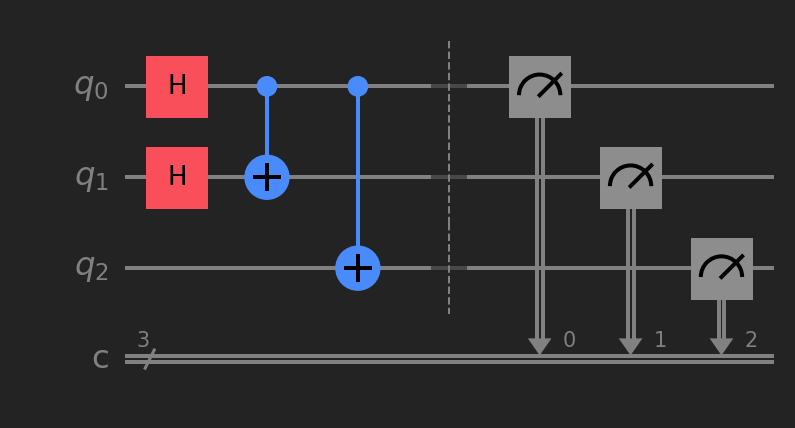

In [23]:
qc = QuantumCircuit(3,3)
qc.h([0,1])
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qc.draw()

In [24]:
from qiskit.visualization import plot_histogram

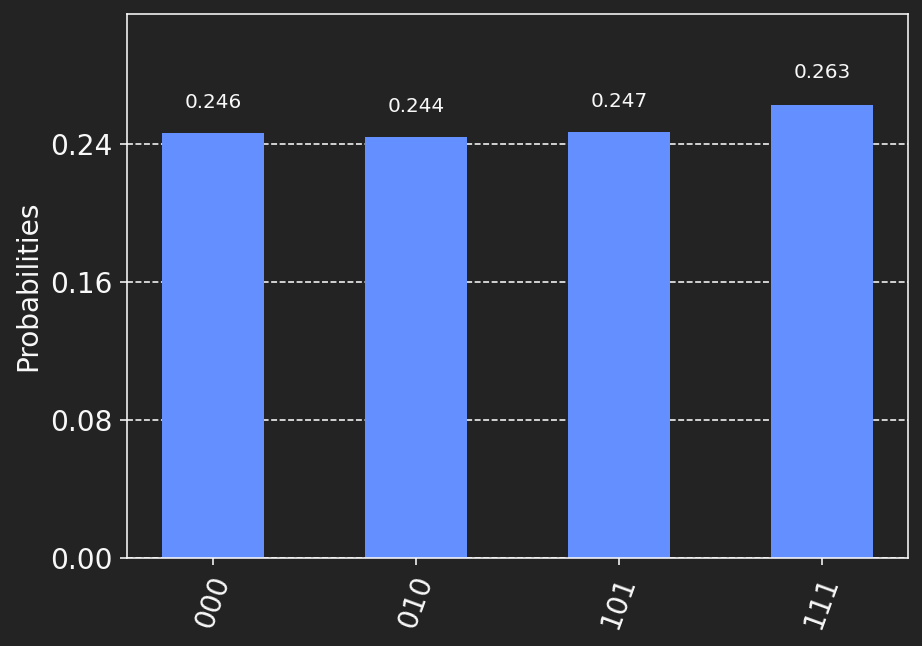

In [25]:
Q_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=Q_simulator)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

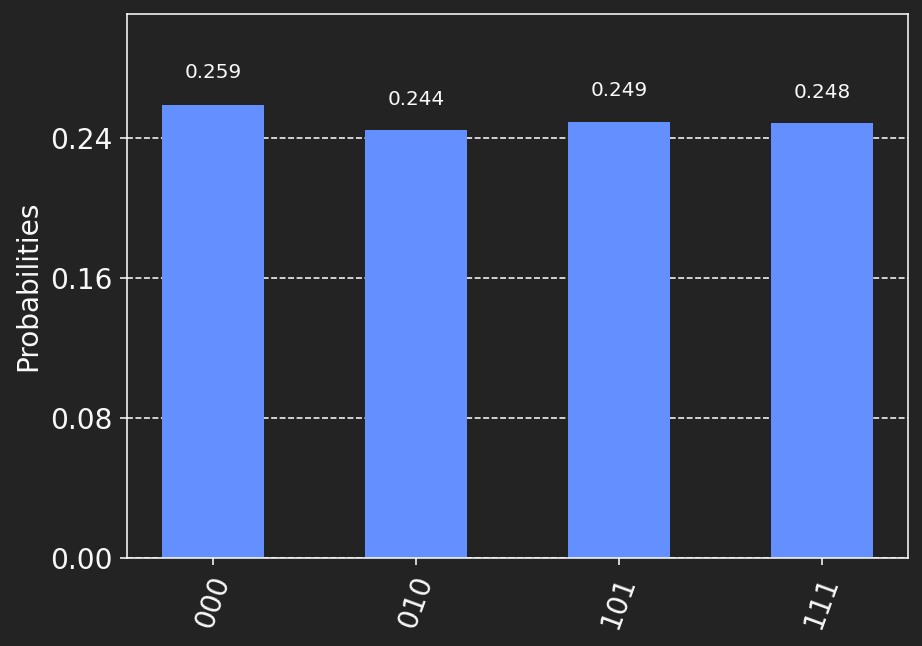

In [26]:
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

---
## Question 5.6

Which of these configuration options could result in the following result object/counts?
```
qc = QuantumCircuit(2)
qc.h([0,1])
qc.measure_all()
     
result = execute(*what goes in here?*).result()
memory = result.get_memory(qc)
print(memory)
   
> ['01', '10', '00', '11', '00', '10', '00', '01', '00', '11', '11', '11', '11',' 11',' 11']
```

**1)** `execute(qc, StatevectorSimulator(), shots=15, memory=True)`

**2)** `execute(qc, QasmSimulator(), shots=10, memory=True)`

**3)** `execute(qc, QasmSimulator(), shots=15, memory=True)`

**4)** `execute(qc, QasmSimulator(), shots=15, memory=False)`

**5)** None of the above

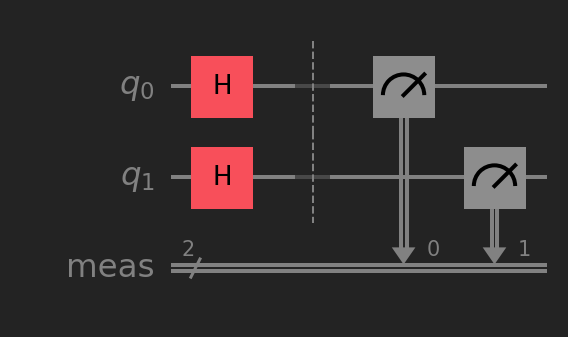

In [27]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.measure_all()
qc.draw()

In [28]:
result = execute(qc, StatevectorSimulator(), shots=15, memory=True).result()
memory = result.get_memory(qc)
print(memory)

QiskitError: 'No memory for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f97d01346d0>". Please verify that you either ran a measurement level 2 job with the memory flag set, eg., "memory=True", or a measurement level 0/1 job.'

In [29]:
from qiskit.providers.aer import QasmSimulator
result = execute(qc, QasmSimulator(), shots=15, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['11', '11', '11', '11', '10', '11', '01', '01', '10', '10', '10', '01', '00', '11', '10']


---
## Question 5.7

Clifford circuits can be efficiently simulated classically in Qiskit using Clifford class in the quantum_info module.
Which of the following is not a Clifford gate?

**1)** `XGate`

**2)** `SdgGate`

**3)** `CXGate`

**4)** `RZGate`

**5)** None of the above

Answer: 4) `RZGate` is not a Clifford gate. The list of Cliffords can be found in qiskit's documentation here: https://qiskit.org/documentation/stubs/qiskit.quantum_info.Clifford.html